In [1]:
pip install matplotlib seaborn pandas


In [8]:
import pandas as pd

# Load the dataset (update the file path if necessary)
df = pd.read_csv('population.csv')

# Preview the first few rows of the dataset
print(df.head())


   no Country (or dependency) Population 2020 Yearly Change  Net Change  \
0   1                   China   1,439,323,776         0.39%   5,540,090   
1   2                   India   1,380,004,385         0.99%  13,586,631   
2   3           United States     331,002,651         0.59%   1,937,734   
3   4               Indonesia     273,523,615         1.07%   2,898,047   
4   5                Pakistan     220,892,340         2.00%   4,327,022   

  Density  (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Med. Age  \
0              153       9,388,211       -348,399        1.7       38   
1              464       2,973,190       -532,687        2.2       28   
2               36       9,147,420        954,806        1.8       38   
3              151       1,811,570        -98,955        2.3       30   
4              287         770,880       -233,379        3.6       23   

  Urban Pop % World Share  
0         61%      18.47%  
1         35%      17.70%  
2         83%       4.25% 

In [9]:


# Check the column names and data types
print(df.info())

# Check for any missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       235 non-null    int64 
 1   Country (or dependency)  235 non-null    object
 2   Population 2020          235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density  (P/Km²)         235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           201 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB
None
no                          0
Country (or dependency)     0
Population 2020             0
Yearly

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Convert 'Med. Age' column to numeric
df['Med. Age'] = pd.to_numeric(df['Med. Age'], errors='coerce')

# Check if any missing values were introduced
print(df['Med. Age'].isnull().sum())


34


In [12]:
# Drop rows with missing 'Med. Age' values
df_cleaned = df.dropna(subset=['Med. Age'])

# Check if there are any missing values left
print(df_cleaned['Med. Age'].isnull().sum())


0


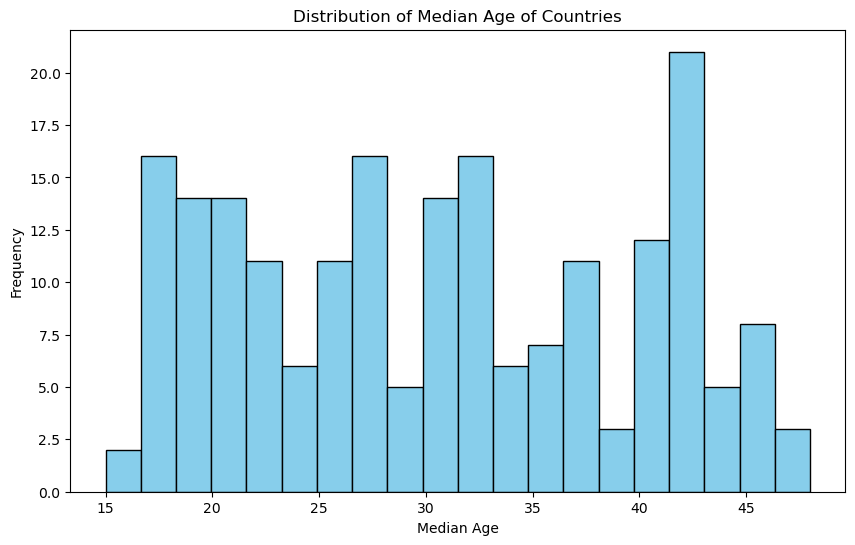

In [13]:
# Plot histogram for 'Med. Age' after handling missing values
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df_cleaned['Med. Age'], bins=20, color='skyblue', edgecolor='black')  # Create histogram
plt.title('Distribution of Median Age of Countries')  # Title of the plot
plt.xlabel('Median Age')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()  # Display the plot


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_36892\3808150764.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Med. Age'], shade=True, color='skyblue')  # Create KDE plot


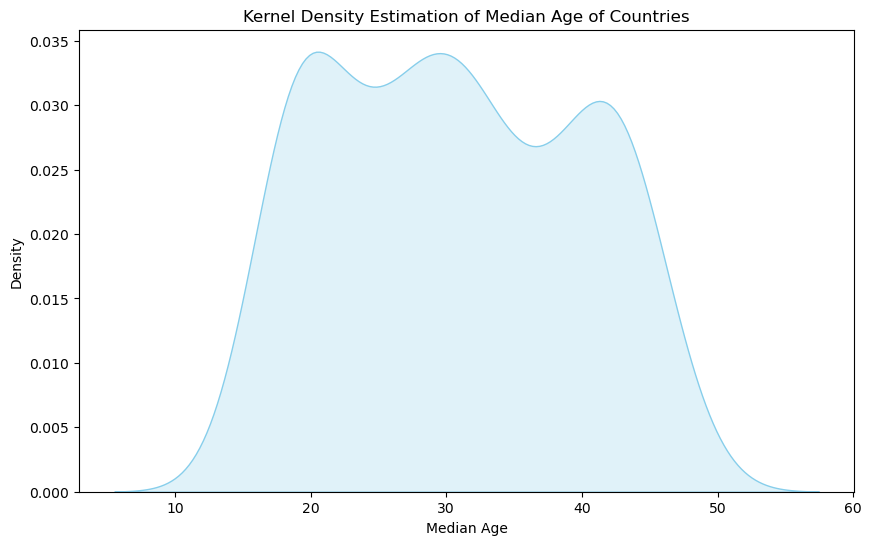

In [14]:
import seaborn as sns

# Plot KDE for 'Med. Age' after handling missing values
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df_cleaned['Med. Age'], shade=True, color='skyblue')  # Create KDE plot
plt.title('Kernel Density Estimation of Median Age of Countries')  # Title of the plot
plt.xlabel('Median Age')  # Label for the x-axis
plt.ylabel('Density')  # Label for the y-axis
plt.show()  # Display the plot


In [15]:
skewness = df_cleaned['Med. Age'].skew()
print(f'Skewness: {skewness}')


Skewness: 0.10846046956111803


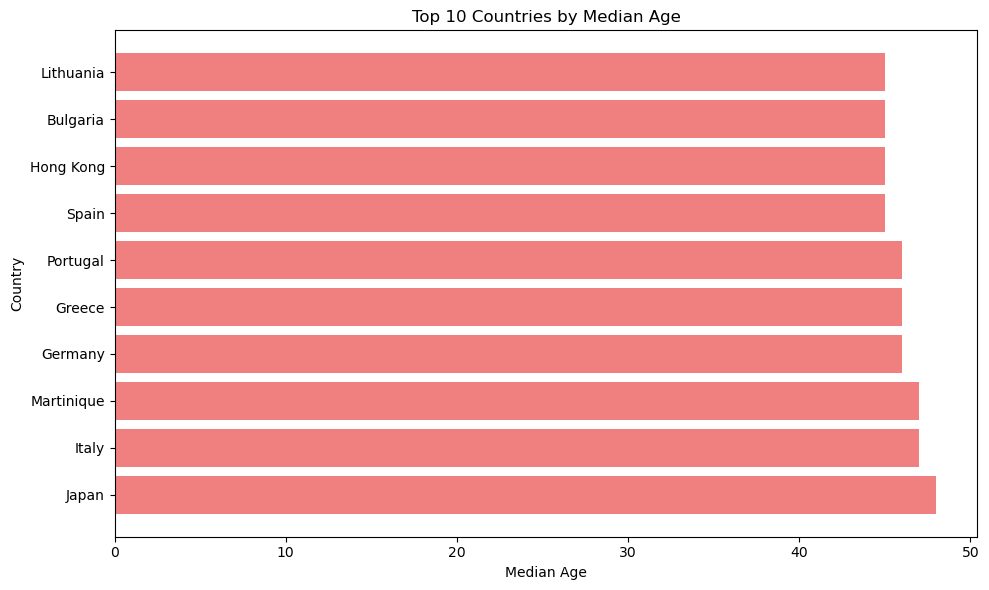

In [20]:
# Select top 10 countries with highest median age
top_countries = df.nlargest(10, 'Med. Age')

# Create a bar chart for the top 10 countries by median age
plt.figure(figsize=(10,6))
plt.barh(top_countries['Country (or dependency)'], top_countries['Med. Age'], color='lightcoral')
plt.xlabel('Median Age')
plt.ylabel('Country')
plt.title('Top 10 Countries by Median Age')
plt.tight_layout()
plt.show()
